Descriptive Analysis on Loan Data

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
#Load the combined CSV file
combined_df = pd.read_csv('combined_file.csv')

Average Amount Loaned

In [108]:
average_loan_amount = combined_df['LoanAmount'].mean()
print("Average Loan Amount:", average_loan_amount)

Average Loan Amount: 148.75732899022802


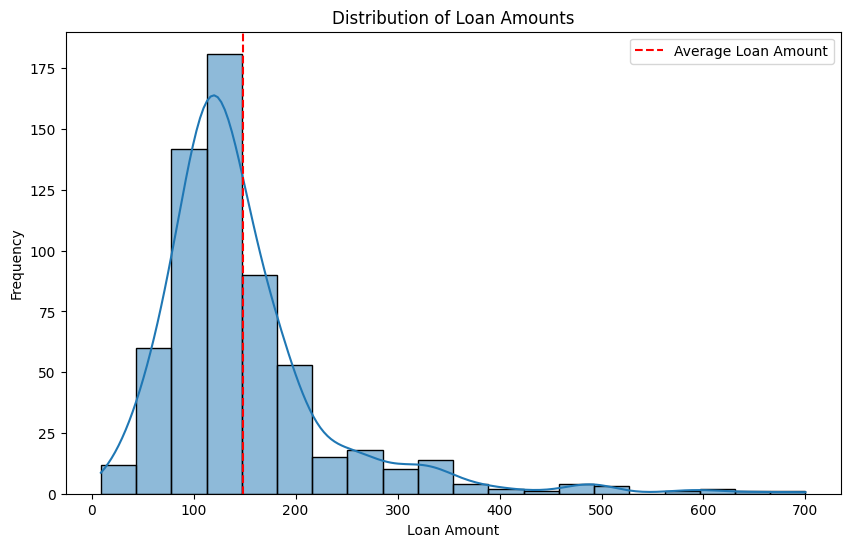

In [109]:
# Step 3: Visualize the distribution of loan amounts
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['LoanAmount'], bins=20, kde=True)
plt.title("Distribution of Loan Amounts")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.axvline(average_loan_amount, color='red', linestyle='--', label='Average Loan Amount')
plt.legend()
plt.show()

Average Loan Term

In [110]:
#Calculate the average loan term
average_loan_term = combined_df['Loan_Amount_Term'].mean()
print("Average Loan Term:", average_loan_term)

Average Loan Term: 333.56677524429966


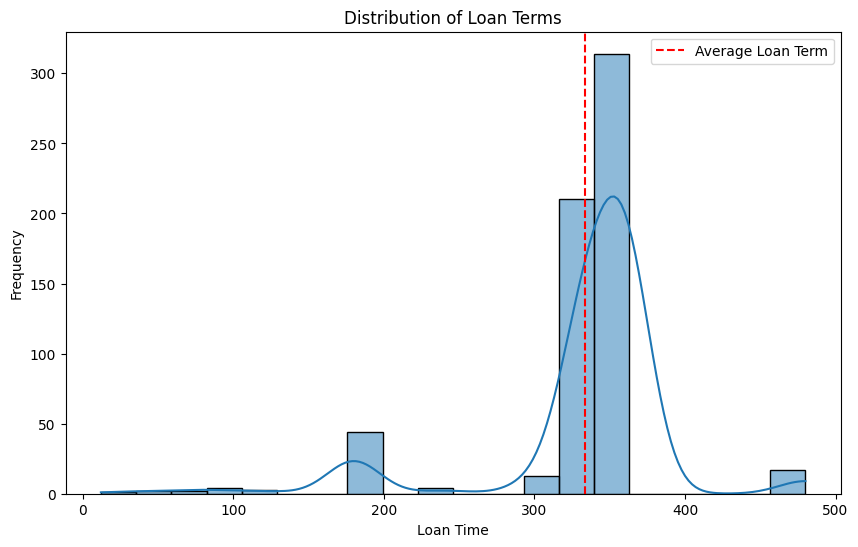

In [111]:
# Visualize the distribution of loan terms
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['Loan_Amount_Term'], bins=20, kde=True)
plt.title("Distribution of Loan Terms")
plt.xlabel("Loan Time")
plt.ylabel("Frequency")
plt.axvline(average_loan_term, color='red', linestyle='--', label='Average Loan Term')
plt.legend()
plt.show()

Total number of applicants broken drown into approved and rejected, the number of males and females in each case and shown in appropriate chart

In [112]:
#Map gender values for clarity
combined_df['Gender'] = combined_df['Gender'].map({1: 'Female', 2: 'Male'})

In [113]:
#Group by Approval Status and Gender
approval_gender_counts = combined_df.groupby(['Loan_Status', 'Gender']).size().unstack(fill_value=0)

<Figure size 1000x600 with 0 Axes>

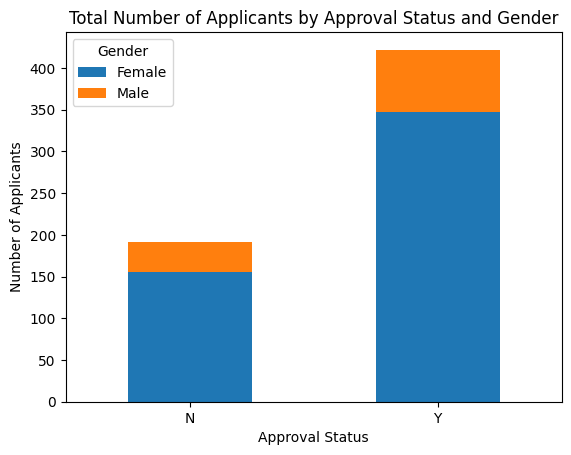

In [114]:
#Plotting the counts
plt.figure(figsize=(10, 6))
approval_gender_counts.plot(kind='bar', stacked=True)
plt.title("Total Number of Applicants by Approval Status and Gender")
plt.xlabel("Approval Status")
plt.ylabel("Number of Applicants")
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.show()

In [115]:
#Display the counts in tabular form
print("Total Applicants Count by Approval Status and Gender:")
print(approval_gender_counts)

Total Applicants Count by Approval Status and Gender:
Gender       Female  Male
Loan_Status              
N               155    37
Y               347    75


For maximum and minimum amount loaned and shown in appropiate chart

In [116]:
#Calculate max and min loan amounts
max_loan_amount = combined_df['LoanAmount'].max()
min_loan_amount = combined_df['LoanAmount'].min()

print("Maximum Loan Amount:", max_loan_amount)
print("Minimum Loan Amount:", min_loan_amount)

Maximum Loan Amount: 700
Minimum Loan Amount: 9


In [117]:
#Prepare data for plotting
loan_summary = pd.DataFrame({
    'Loan Type': ['Max Loan Amount', 'Min Loan Amount'],
    'Amount': [max_loan_amount, min_loan_amount]
})

C:\Users\Saumitra\AppData\Local\Temp\ipykernel_21888\2194251053.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Loan Type', y='Amount', data=loan_summary, palette='pastel')


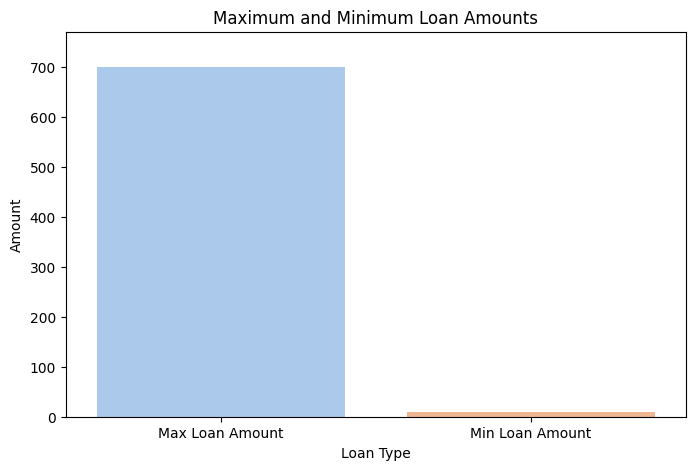

In [118]:
#Plotting the max and min loan amounts
plt.figure(figsize=(8, 5))
sns.barplot(x='Loan Type', y='Amount', data=loan_summary, palette='pastel')
plt.title("Maximum and Minimum Loan Amounts")
plt.ylabel("Amount")
plt.xlabel("Loan Type")
plt.ylim(0, max_loan_amount * 1.1)  # Set limit for better visualization
plt.show()

The number of self employed who had their loan approved, expressed as a percentage of all who had it approved and shown in appropriate chart

In [119]:
#Filter the DataFrame for approved loans
approved_loans_df = combined_df[combined_df['Loan_Status'] == 'Y']

#Calculate the number of self-employed individuals with approved loans
self_employed_count = approved_loans_df[approved_loans_df['Self_Employed'] == 1].shape[0]

#Calculate the total number of approved loans
total_approved_count = approved_loans_df.shape[0]

In [120]:
#Calculate the percentage of self-employed individuals who had their loans approved
percentage_self_employed_approved = (self_employed_count / total_approved_count) * 100 if total_approved_count > 0 else 0

print("Number of Self-Employed Individuals with Approved Loans:", self_employed_count)
print("Total Number of Approved Loans:", total_approved_count)
print("Percentage of Self-Employed Individuals Approved:", percentage_self_employed_approved)

Number of Self-Employed Individuals with Approved Loans: 56
Total Number of Approved Loans: 422
Percentage of Self-Employed Individuals Approved: 13.270142180094787


In [121]:
#Prepare data for visualization
labels = ['Self-Employed Approved', 'Other Approved']
sizes = [self_employed_count, total_approved_count - self_employed_count]

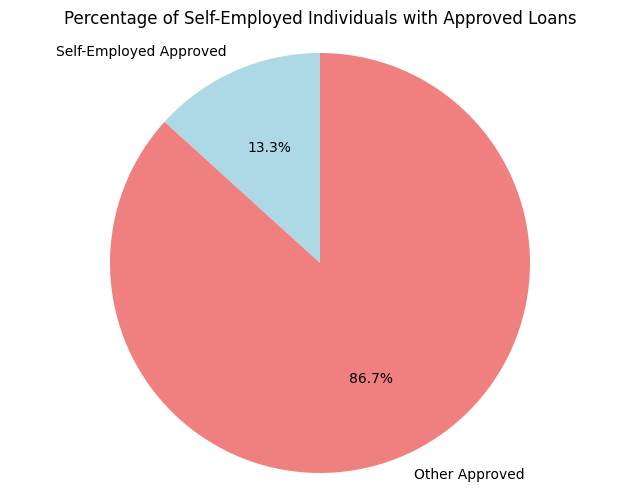

In [122]:
#Plotting the data as a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title("Percentage of Self-Employed Individuals with Approved Loans")
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.
plt.show()

Optional:

Income distribution of all main applicants showing average and standard deviation

In [123]:
# Assuming the column containing income data is named 'income'
income_data = combined_df['ApplicantIncome']

# Calculate average and standard deviation
avg_income = income_data.mean()
std_income = income_data.std()

In [124]:
print(f"Average Income: {avg_income:.2f}")
print(f"Standard Deviation of Income: {std_income:.2f}")


Average Income: 5403.46
Standard Deviation of Income: 6109.04


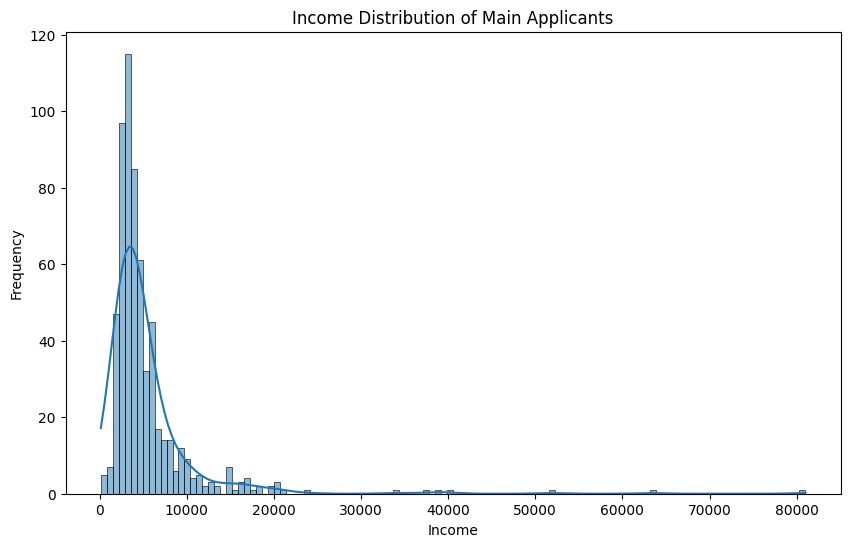

In [125]:
# Visualize income distribution
plt.figure(figsize=(10, 6))
sns.histplot(income_data, kde=True)
plt.title('Income Distribution of Main Applicants')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

Top 10 applicant by loan amount

In [126]:
#Sort the DataFrame by loan amount
top_10_applicants = combined_df[['Loan_ID','LoanAmount']].sort_values(by='LoanAmount', ascending=False).head(10)

In [127]:
# Display the top 10 applicants
print("Top 10 Applicants by Loan Amount:")
print(top_10_applicants)

Top 10 Applicants by Loan Amount:
     Loan_ID  LoanAmount
418     1585         700
377     1469         650
402     1536         600
194     2813         600
585     2191         570
120     2547         500
237     2959         496
424     1610         495
549     2101         490
524     1996         480


The distribution of properties (rural,urban etc) of all loan applicants, shown in appropriate chart. 

In [128]:
#Map numerical values to property types
property_mapping = {1: 'Rural', 2: 'Local', 3: 'Urban'}
combined_df['Property_Area'] = combined_df['Property_Area'].map(property_mapping)

In [129]:
#Count the distribution of property types
property_distribution = combined_df['Property_Area'].value_counts()

C:\Users\Saumitra\AppData\Local\Temp\ipykernel_21888\4024595667.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=property_distribution.index, y=property_distribution.values, palette='viridis')


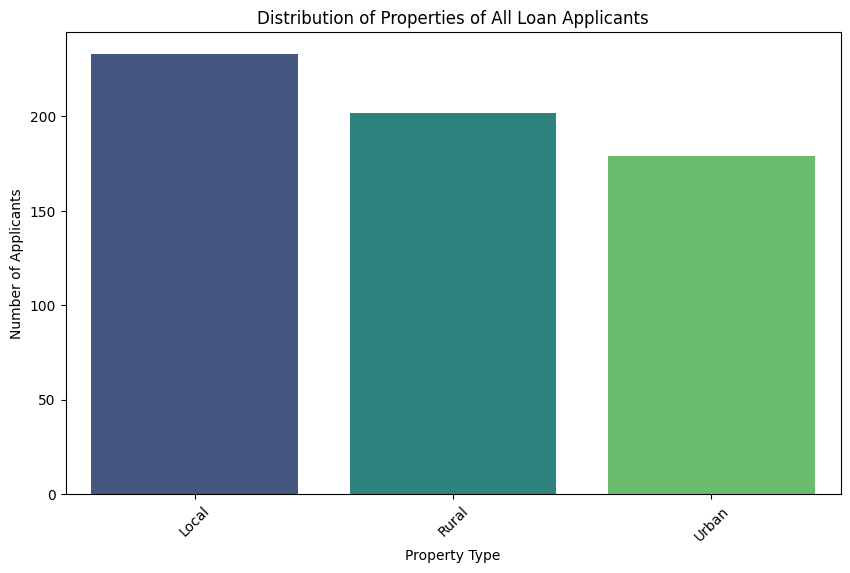

In [130]:
#Plot the distribution of properties
plt.figure(figsize=(10, 6))
sns.barplot(x=property_distribution.index, y=property_distribution.values, palette='viridis')
plt.title("Distribution of Properties of All Loan Applicants")
plt.xlabel("Property Type")
plt.ylabel("Number of Applicants")
plt.xticks(rotation=45)
plt.show()